# Exploratory Data Analysis & Intro
## Goal
1. Investigate top-paying roles and skills in the data science industry.
2. Using Python to explore a real-live dataset on job postings.
3. Use these insights to help find the best job opportunities.

## Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)


## Exploratory Data Analysis for all Data Roles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

# Loding data set
df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\JobPosting_Project\data_jobs.csv')

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filtering data for Data science roles 
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']
df_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short'].isin(job_titles))].copy()

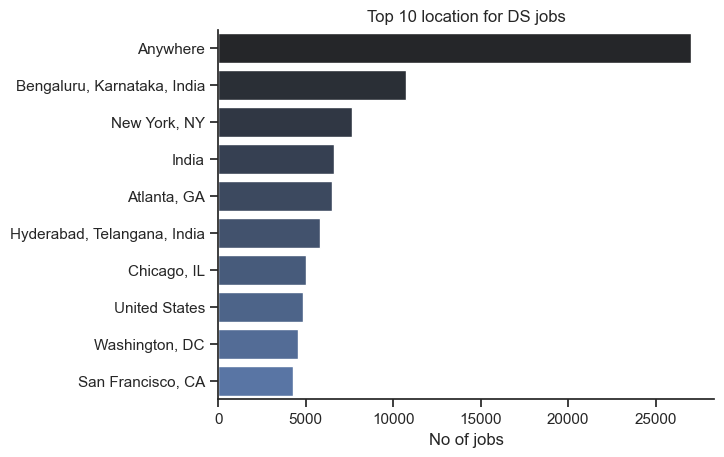

In [22]:
df_plot = df_Ind_US['job_location'].value_counts().head(10).to_frame()
fig, ax = plt.subplots()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', dodge=False)
sns.despine()
ax.set_title('Top 10 location for DS jobs')
ax.set_xlabel('No of jobs')
ax.set_ylabel('')
ax.legend().remove()
plt.show()

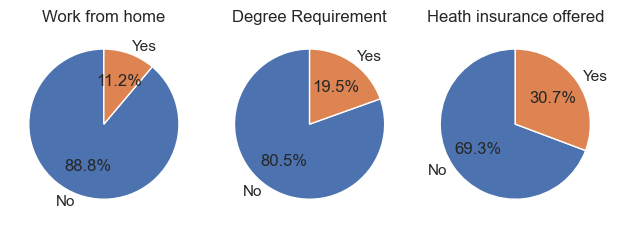

In [24]:
fig, ax = plt.subplots(1,3)

dict_colm={
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Heath insurance offered' 
}


for i,(column,title) in enumerate(dict_colm.items()):
    ax[i].pie(df_Ind_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()

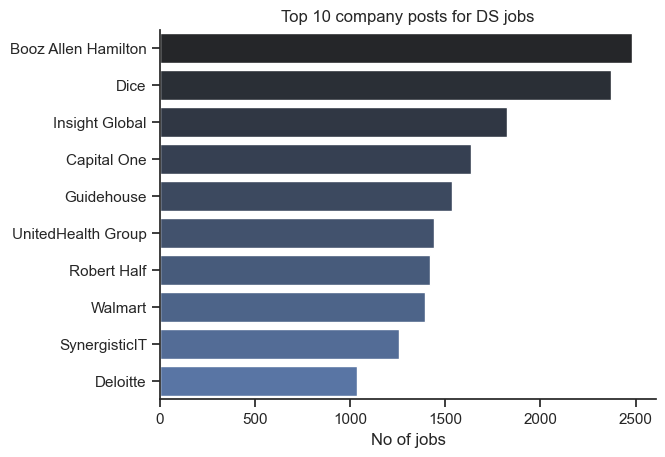

In [25]:
df_plot = df_Ind_US['company_name'].value_counts().head(10).to_frame()
fig, ax = plt.subplots()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', dodge=False)
sns.despine()
ax.set_title('Top 10 company posts for DS jobs')
ax.set_xlabel('No of jobs')
ax.set_ylabel('')
ax.legend().remove()
plt.show()